In [1]:
import pandas as pd
import numpy as np 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv')
df.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

rotten_tomatoes_link - 0.0%
movie_title - 0.0%
movie_info - 2.0%
critics_consensus - 48.0%
content_rating - 0.0%
genres - 0.0%
directors - 1.0%
authors - 9.0%
actors - 2.0%
original_release_date - 7.0%
streaming_release_date - 2.0%
runtime - 2.0%
production_company - 3.0%
tomatometer_status - 0.0%
tomatometer_rating - 0.0%
tomatometer_count - 0.0%
audience_status - 3.0%
audience_rating - 2.0%
audience_count - 2.0%
tomatometer_top_critics_count - 0.0%
tomatometer_fresh_critics_count - 0.0%
tomatometer_rotten_critics_count - 0.0%


In [6]:
cols_to_drop = ['critics_consensus', 'movie_info','directors', 'authors', 'actors', 'streaming_release_date','runtime', 'production_company', 'tomatometer_count', 
                'audience_status', 'tomatometer_rating', 'audience_count', 'tomatometer_top_critics_count','audience_rating','original_release_date', 'rotten_tomatoes_link' ,'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']
df_dropped_colums = df.drop(cols_to_drop, axis=1)
df_dropped_colums.head()

,movie_title,content_rating,genres,tomatometer_status
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Rotten
1,Please Give,R,Comedy,Certified-Fresh
2,10,R,"Comedy, Romance",Fresh
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",Certified-Fresh
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Fresh


In [7]:

df_dropped_colums.replace(0, np.nan, inplace=True)
df_dropped_colums[df_dropped_colums.isna().any(axis=1)]
df_dropped_colums = df_dropped_colums.dropna()
print(df_dropped_colums.isnull().sum())

movie_title           0
content_rating        0
genres                0
tomatometer_status    0
dtype: int64


In [8]:
#df_dropped_colums["genres"] = df_dropped_colums["genres"].replace("&","")
#df_dropped_colums.head()

In [9]:
#new_df = df_dropped_colums[df_dropped_colums['genres'].str.contains('Adventure')]
#new_df

In [10]:
#df_dropped_colums["genres"] = df_dropped_colums["genres"].apply(lambda x: x.split(" & ") if type(x) == str else x)

In [11]:
#df_dropped_colums.head()

In [12]:

df_dropped_colums["genres"] = df_dropped_colums["genres"].apply(lambda x: x.split(",") if type(x) == str else x)
#df_dropped_colums["genres"] = df_dropped_colums["genres"].str.replace("&","")
#new_df = df_dropped_colums[df_dropped_colums['genres'].str.contains('Adventure')]
#new_df
df_dropped_colums.head()

,movie_title,content_rating,genres,tomatometer_status
0,Percy Jackson & the Olympians: The Lightning T...,PG,"[Action & Adventure, Comedy, Drama, Science...",Rotten
1,Please Give,R,[Comedy],Certified-Fresh
2,10,R,"[Comedy, Romance]",Fresh
3,12 Angry Men (Twelve Angry Men),NR,"[Classics, Drama]",Certified-Fresh
4,"20,000 Leagues Under The Sea",G,"[Action & Adventure, Drama, Kids & Family]",Fresh


In [13]:
# df_dropped_colums.iloc[0]['genres'][0].split('&')

In [22]:
df_explode_2 = df_dropped_colums.explode('genres')
#df_explode_2
new_df = df_explode_2[df_explode_2['genres'].str.contains('Action & Adventure')]
new_df

,movie_title,content_rating,genres,tomatometer_status
0,Percy Jackson & the Olympians: The Lightning T...,PG,Action & Adventure,Rotten
4,"20,000 Leagues Under The Sea",G,Action & Adventure,Fresh
5,"10,000 B.C.",PG-13,Action & Adventure,Rotten
6,The 39 Steps,NR,Action & Adventure,Certified-Fresh
18,The Adventures of Mark Twain,G,Action & Adventure,Fresh
...,...,...,...,...
17702,Zoo,PG,Action & Adventure,Fresh
17706,Zoom,PG,Action & Adventure,Rotten
17708,Zootopia,PG,Action & Adventure,Certified-Fresh
17709,Zorba the Greek,NR,Action & Adventure,Fresh


In [23]:
#new_df = new_df['genres'].apply(lambda x: x.replace('Action & Adventure', 'Adventure'))
#new_df["genres"].apply(lambda x: x.split(",") if type(x) == str else x)

In [24]:
new_df.head()

,movie_title,content_rating,genres,tomatometer_status
0,Percy Jackson & the Olympians: The Lightning T...,PG,Action & Adventure,Rotten
4,"20,000 Leagues Under The Sea",G,Action & Adventure,Fresh
5,"10,000 B.C.",PG-13,Action & Adventure,Rotten
6,The 39 Steps,NR,Action & Adventure,Certified-Fresh
18,The Adventures of Mark Twain,G,Action & Adventure,Fresh


In [25]:
new_df.set_index('genres')

,movie_title,content_rating,tomatometer_status
genres,,,
Action & Adventure,Percy Jackson & the Olympians: The Lightning T...,PG,Rotten
Action & Adventure,"20,000 Leagues Under The Sea",G,Fresh
Action & Adventure,"10,000 B.C.",PG-13,Rotten
Action & Adventure,The 39 Steps,NR,Certified-Fresh
Action & Adventure,The Adventures of Mark Twain,G,Fresh
...,...,...,...
Action & Adventure,Zoo,PG,Fresh
Action & Adventure,Zoom,PG,Rotten
Action & Adventure,Zootopia,PG,Certified-Fresh


In [26]:
#for col in df_dropped_colums.columns:
    #pct_missing = np.mean(df_dropped_colums[col].isnull())
    #print('{} - {}%'.format(col, round(pct_missing*100)))

In [27]:
#df_dropped_colums= df_dropped_colums.sort_values("tomatometer_status", ascending=True).set_index('movie_title')


In [28]:
#df_dropped_colums.dropna()

In [29]:
new_df.replace({'G': 0, 'PG': 1, 'PG-13': 2, 'NC17': 3, 'NR': 4, 'R': 5})

,movie_title,content_rating,genres,tomatometer_status
0,Percy Jackson & the Olympians: The Lightning T...,1,Action & Adventure,Rotten
4,"20,000 Leagues Under The Sea",0,Action & Adventure,Fresh
5,"10,000 B.C.",2,Action & Adventure,Rotten
6,The 39 Steps,4,Action & Adventure,Certified-Fresh
18,The Adventures of Mark Twain,0,Action & Adventure,Fresh
...,...,...,...,...
17702,Zoo,1,Action & Adventure,Fresh
17706,Zoom,1,Action & Adventure,Rotten
17708,Zootopia,1,Action & Adventure,Certified-Fresh
17709,Zorba the Greek,4,Action & Adventure,Fresh


In [38]:
new_df['movie_count'] = 1

<ipython-input-38-3d676f9653be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movie_count'] = 1


In [39]:
df_cor = new_df.groupby(['content_rating', 'tomatometer_status']).count()
df_cor

movie_title  genres  movie_count
content_rating tomatometer_status                                  
G              Certified-Fresh              24      24           24
               Fresh                        94      94           94
               Rotten                       68      68           68
NC17           Fresh                         1       1            1
NR             Certified-Fresh              41      41           41
               Fresh                       354     354          354
               Rotten                      191     191          191
PG             Certified-Fresh             112     112          112
               Fresh                       189     189          189
               Rotten                      304     304          304
PG-13          Certified-Fresh             160     160          160
               Fresh                       138     138          138
               Rotten                      504     504          504
R              Certified-Fresh             210     210          210
               Fresh                       341     341          341
               Rotten                      811     811          811

In [47]:
df_cor = df_cor.reset_index()

In [48]:
df_cor.groupby('tomatometer_status').count()

,content_rating,movie_title,genres,movie_count
tomatometer_status,,,,
Certified-Fresh,5,5,5,5
Fresh,6,6,6,6
Rotten,5,5,5,5


In [49]:
df_cor['content_rating'].value_counts()

G        3
NR       3
PG-13    3
PG       3
R        3
NC17     1
Name: content_rating, dtype: int64

In [50]:
new_df.head()

,movie_title,content_rating,genres,tomatometer_status,movie_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,Action & Adventure,Rotten,1
4,"20,000 Leagues Under The Sea",G,Action & Adventure,Fresh,1
5,"10,000 B.C.",PG-13,Action & Adventure,Rotten,1
6,The 39 Steps,NR,Action & Adventure,Certified-Fresh,1
18,The Adventures of Mark Twain,G,Action & Adventure,Fresh,1


In [51]:
#content_rating compare to tomatometer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [52]:
#df_cor = df_cor.reset_index()

In [53]:
df_cor

,content_rating,tomatometer_status,movie_title,genres,movie_count
0,G,Certified-Fresh,24,24,24
1,G,Fresh,94,94,94
2,G,Rotten,68,68,68
3,NC17,Fresh,1,1,1
4,NR,Certified-Fresh,41,41,41
5,NR,Fresh,354,354,354
6,NR,Rotten,191,191,191
7,PG,Certified-Fresh,112,112,112
8,PG,Fresh,189,189,189
9,PG,Rotten,304,304,304


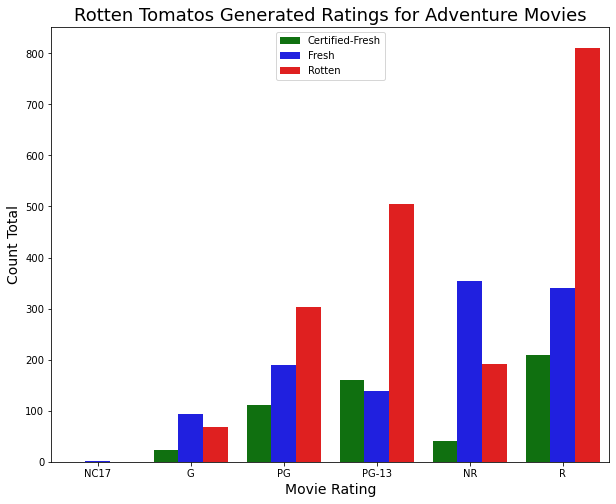

In [56]:


plt.figure(figsize=(10, 8))
sns.barplot(x='content_rating', 
            y='movie_count', 
            hue='tomatometer_status',
            order=["NC17","G","PG","PG-13",'NR', 'R'],
            data=df_cor, palette=['green', 'blue', 'red'])
plt.ylabel("Count Total", size=14)
plt.xlabel("Movie Rating", size=14)
plt.title("Rotten Tomatos Generated Ratings for Adventure Movies", size=18)
plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
plt.legend()

In [ ]:
#plot_one_fig, plot_one_ax = plt.subplots(figsize=(15,6))

# passing in our x and y data into .plot function
#plot_one_ax.bar(rates.index, rates)

# Add labels for x and y axes
#plot_one_ax.set_xlabel('Ratings', fontsize=15)
#plot_one_ax.set_ylabel('Count of Rating', fontsize=15)

# Add a title for the plot
#plot_one_ax.set_title('Count of Each Rating', fontsize=30)